<a href="https://colab.research.google.com/github/Ivan8Garcia/data-science/blob/main/optimizacion_aeroportuaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import yellowbrick

print(f'Versión de pandas: {pd.__version__}')
print(f'Versión de numpy: {np.__version__}')
print(f'Versión de scikit-learn (sklearn): {sklearn.__version__}')
print(f'Versión de seaborn: {sns.__version__}')
print(f'Versión de yellowbrick: {yellowbrick.__version__}')

Versión de pandas: 2.2.2
Versión de numpy: 2.0.2
Versión de scikit-learn (sklearn): 1.6.1
Versión de seaborn: 0.13.2
Versión de yellowbrick: 1.5


In [26]:
datos= pd.read_csv("/content/flights.csv")
datos.shape

(71175, 11)

In [27]:
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885.071.100.621.520,10.885.071.100.621.500,0,2010,False,7.020.598.057.342.370
1,10,YE,Airbus A320,non-schengen,TCY,893.999.569.161.395,1.193.999.569.161.390,0,2010,False,38.484.609.338.469.500
2,3,BZ,Embraer E175,schengen,TZF,1.863.538.375.746.070,2.263.538.375.746.070,0,2010,False,23.883.054.653.629.400
3,28,BZ,Airbus A330,non-schengen,EMM,15.967.962.746.548.000,17.967.962.746.548.000,0,2010,False,19.138.491.329.077.900
4,15,BZ,Airbus A330,non-schengen,FJB,16.571.894.330.137.800,19.571.894.330.137.800,0,2010,False,15.016.271.188.399.000


In [28]:
# en delay tenemos en la primer fila un retraso de 70 minutos y multiplicamos .20*60 segundos y el resultado son 12seg. asi que tenemos 70min con 12seg
round(.20*60)

12

In [29]:
#igual para arrival_time tenemos 8.885,es la hora de llegada y multiplicamos (60*0.88=53)y tenemos que la hora de llegada es a las 8:53min
round(.885*60)

53

In [30]:
datos.describe()

,flight_id,day,year
count,71175.000000,71175.000000,71175.000000
mean,15.465135,182.000000,2016.000000
std,8.649646,105.366769,3.741684
min,1.000000,0.000000,2010.000000
25%,8.000000,91.000000,2013.000000
50%,15.000000,182.000000,2016.000000
75%,23.000000,273.000000,2019.000000
max,30.000000,364.000000,2022.000000


In [31]:
datos.describe(include="O")

,airline,aircraft_type,schengen,origin,arrival_time,departure_time,delay
count,71175,71175,71175,71175,71175,71175,71175
unique,3,6,2,10,30,30,71175
top,BZ,Airbus A320,schengen,TZF,10.172.730.878.911.900,13.172.730.878.911.900,4.140.164.813.069.420
freq,47598,30778,42569,14162,2452,2452,1


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt



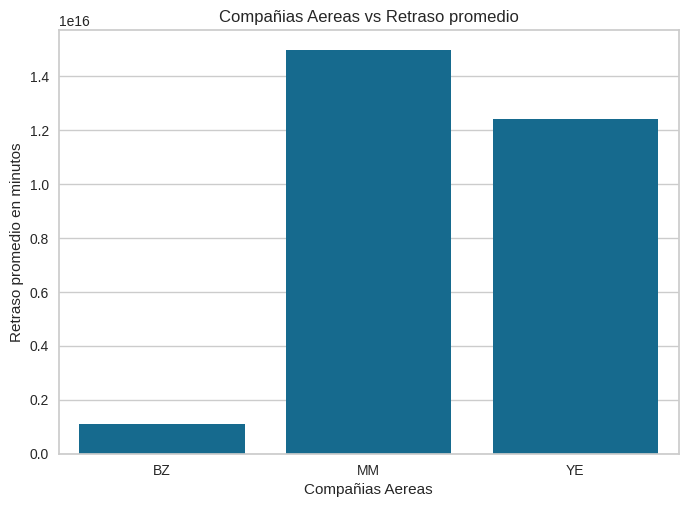

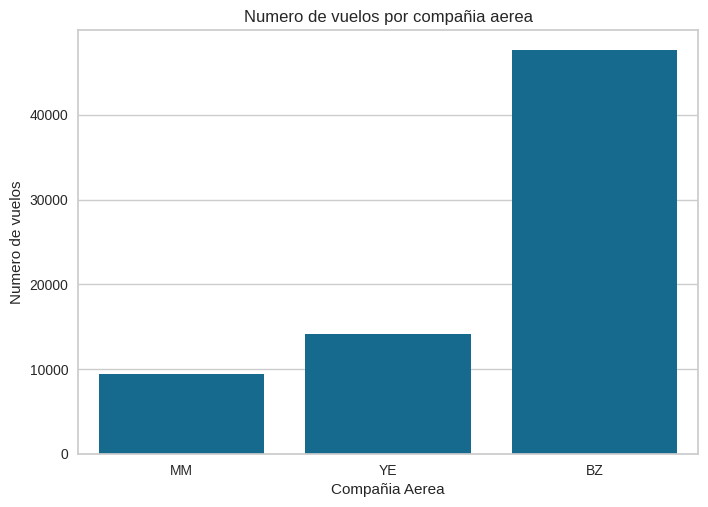

In [33]:
# convierte la columna "delay" en minutos para poder visulizar el retraso correctamente
datos['delay'] = datos['delay'].str.replace('.', '', regex=False)
datos['delay'] = pd.to_numeric(datos['delay'])

avg_delay= datos.groupby("airline")["delay"].mean().reset_index()
sns.barplot(x="airline",y="delay",data=avg_delay)
plt.title("Compañias Aereas vs Retraso promedio")
plt.xlabel("Compañias Aereas")
plt.ylabel("Retraso promedio en minutos")
plt.show()

sns.countplot(data=datos,x="airline")
plt.title("Numero de vuelos por compañia aerea")
plt.xlabel("Compañia Aerea")
plt.ylabel("Numero de vuelos")
plt.show()